
# MACHINE LEARNING ALGORITHM ANALYSIS


##  Breast Cancer Prediction


**Data Set Information:**
There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer. 

###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra#
 
 
###  Attribute Information:

Quantitative Attributes: 
  - Age (years) 
  - BMI (kg/m2) 
  - Glucose (mg/dL) 
  - Insulin (µU/mL) 
  - HOMA 
  - Leptin (ng/mL) 
  - Adiponectin (µg/mL) 
  - Resistin (ng/mL) 
  - MCP-1(pg/dL) 
                                        
 
 Labels: 
  - 1=Healthy controls 
  - 2=Patients
 

### Import packages

In [1]:
#!pip install sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import the dataset

In [2]:

cancer_data = pd.read_csv('https://raw.githubusercontent.com/nazneenansari/dataset/master/dataR2.csv')
cancer_data.head() 

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### Check the columns present in the dataset

In [3]:
cancer_data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

### Standardize the column headers to lower case

In [4]:
cancer_data.columns = cancer_data.columns.str.lower()
cancer_data.columns

Index(['age', 'bmi', 'glucose', 'insulin', 'homa', 'leptin', 'adiponectin',
       'resistin', 'mcp.1', 'classification'],
      dtype='object')

### Check the shape of Dataset

In [5]:
cancer_data.shape 

(116, 10)

### Check the descriptive statistics of the dataset

In [6]:
cancer_data.describe() 

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp.1,classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### Check the info of the dataset

In [7]:
cancer_data.info() 
cancer_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
age               116 non-null int64
bmi               116 non-null float64
glucose           116 non-null int64
insulin           116 non-null float64
homa              116 non-null float64
leptin            116 non-null float64
adiponectin       116 non-null float64
resistin          116 non-null float64
mcp.1             116 non-null float64
classification    116 non-null int64
dtypes: float64(7), int64(3)
memory usage: 9.1 KB


age               0
bmi               0
glucose           0
insulin           0
homa              0
leptin            0
adiponectin       0
resistin          0
mcp.1             0
classification    0
dtype: int64

### Count of Patient(_1) and Healthy(_2) 

In [8]:
cancer_data.classification.value_counts()

2    64
1    52
Name: classification, dtype: int64

Text(0.5, 1.0, 'Correlation between features')

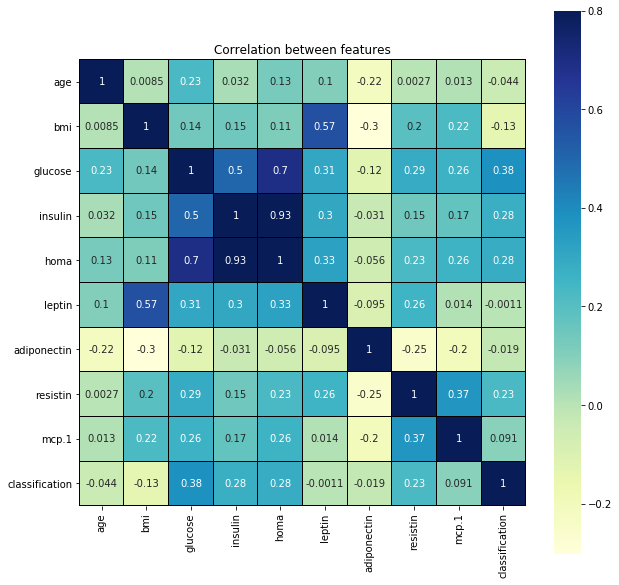

In [9]:
corr = cancer_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [10]:
cancer_data['label']= np.where(cancer_data['classification']==1, 1, 0)
cancer_data.label.value_counts()

0    64
1    52
Name: label, dtype: int64

### 1. Extract the independent columns to prepare X 

In [11]:
X = pd.DataFrame()
def log():
    X = cancer_data.loc[:,cancer_data.columns != 'label']
    return X
X = log()

### 2. Extract dependent column into a dataframe 'y' for model prediction

In [12]:
y = pd.DataFrame()
def log():
    y = cancer_data.loc[:,cancer_data.columns == 'label']
    return y
y = log()


### 3. Splitting X and y into train and test dataset

In [13]:
from sklearn.model_selection import train_test_split
def log():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = log()

### Check the shape of X and y of train dataset.

In [14]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

(87, 10)
(87, 1)


### Check the shape of X and y of test dataset.

In [15]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

(29, 10)
(29, 1)


### 4. Instantitate Logistic Regression model using scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model1 = LogisticRegression(intercept_scaling=1,dual=False, fit_intercept=True, penalty='l2', tol=0.0001)
#model2 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, random_state = 0, max_depth=3, min_samples_split=5, min_samples_leaf=4)
#model3 = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

### 5. Fit the logistic model on X_train and y_train

In [17]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

    

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 6. Using the model for prediction

In [18]:
pred_train_1 = model1.predict(X_train)
pred_train_2 = model2.predict(X_train)
pred_train_3 = model3.predict(X_train)

In [19]:
pred_test_1 = model1.predict(X_test)
pred_test_2 = model2.predict(X_test)
pred_test_3 = model3.predict(X_test)

### 7. Model evaluation using accuracy classification score

In [20]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for Logistic Regression is:', accuracy_score(y_test,pred_test_1))
    print('Accuracy score for Decision Tree is:', accuracy_score(y_test,pred_test_2))
    print('Accuracy score for Random Forest is:', accuracy_score(y_test,pred_test_3))
log()

Accuracy score for Logistic Regression is: 0.9655172413793104
Accuracy score for Decision Tree is: 1.0
Accuracy score for Random Forest is: 0.9310344827586207


### 8. Model evaluation using Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, pred_test_1))
confusion_matrix_2 = pd.DataFrame(confusion_matrix(y_test, pred_test_2))
confusion_matrix_3 = pd.DataFrame(confusion_matrix(y_test, pred_test_3))
def log():
    print('-------------------Logistic Regression -----------------')
    confusion_matrix_1.index = ['Actual Healthy','Actual Patient']
    confusion_matrix_1.columns = ['Predicted Healthy','Predicted Patient']
    print(confusion_matrix_1)
    print('-------------------Decision Tree ----------------------')
    confusion_matrix_2.index = ['Actual Healthy','Actual Patient']
    confusion_matrix_2.columns = ['Predicted Healthy','Predicted Patient']
    print(confusion_matrix_2)
    print('-------------------Random Forest ----------------------')
    confusion_matrix_3.index = ['Actual Healthy','Actual Patient']
    confusion_matrix_3.columns = ['Predicted Healthy','Predicted Patient']
    print(confusion_matrix_3)
log()

-------------------Logistic Regression -----------------
                Predicted Healthy  Predicted Patient
Actual Healthy                 19                  1
Actual Patient                  0                  9
-------------------Decision Tree ----------------------
                Predicted Healthy  Predicted Patient
Actual Healthy                 20                  0
Actual Patient                  0                  9
-------------------Random Forest ----------------------
                Predicted Healthy  Predicted Patient
Actual Healthy                 20                  0
Actual Patient                  2                  7


### 9. Model evaluation using precision score

In [22]:
from sklearn.metrics import precision_score

precision1 = precision_score(y_test,pred_test_1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,pred_test_2)
print('Precision score for test data using model2 is:', precision2)
precision3 = precision_score(y_test,pred_test_3)
print('Precision score for test data using model3 is:', precision3)

Precision score for test data using model1 is: 0.9
Precision score for test data using model2 is: 1.0
Precision score for test data using model3 is: 1.0


### 10. Model evaluation using recall score

In [23]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,pred_test_1))   
print('Recall score for test data using model2 is:',recall_score(y_test,pred_test_2))
print('Recall score for test data using model3 is:',recall_score(y_test,pred_test_3))

Recall score for test data using model1 is: 1.0
Recall score for test data using model2 is: 1.0
Recall score for test data using model3 is: 0.7777777777777778


### 11. Model evaluation using F1_score

In [24]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, pred_test_1))
print('F1_score for test data using model2 is:',f1_score(y_test, pred_test_2))
print('F1_score for test data using model3 is:',f1_score(y_test, pred_test_3))

F1_score for test data using model1 is: 0.9473684210526316
F1_score for test data using model2 is: 1.0
F1_score for test data using model3 is: 0.8750000000000001


### 12. Model evaluation using ROC_AUC curve
- For model1

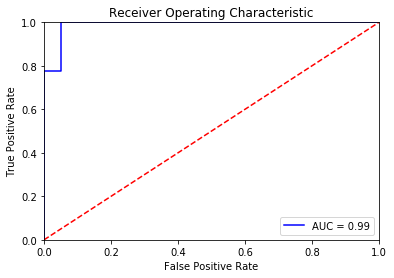

In [25]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- For model2

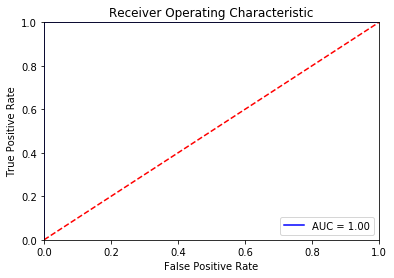

In [26]:
probs = model2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- For model3

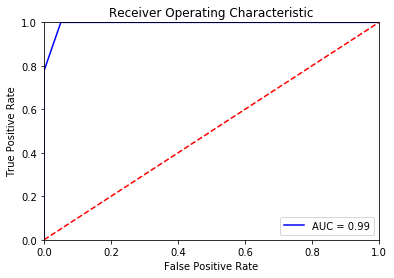

In [27]:
probs = model3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 13. Choosing better model using precision score

### TODO


We have compared the performance of the two models using various model evaluation techinques.<br/>
Our objective is to __minimize False Positive__ so that no innocent is convicted as guilty. Therefore, among recall & precision scores, we will give more importance to __precision score__.


- Precision score for model1 is: __0.62__
- Precision score for model2 is: __1__

As __precision score of model2 is greater__ than that of model1, therefore, __model2 is preferable.__